In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
from bs4 import BeautifulSoup
import pandas as pd
from selenium.webdriver.chrome.options import Options
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


ModuleNotFoundError: No module named 'selenium'

In [2]:

options = webdriver.ChromeOptions()
# options.add_argument('--headless')  # Uncomment to run headlessly after confirming the script works visually
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

url = "https://www.fotmob.com/leagues/47/stats/season/20720/players/goals/premier-league-players"
driver.get(url)

all_links = []

try:
    wait = WebDriverWait(driver, 10) 
    while True:
        
        wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, '.css-fvfi51-LeagueSeasonStatsTableCSS.eybz1nb15 a')))

      
        links = driver.find_elements(By.CSS_SELECTOR, '.css-fvfi51-LeagueSeasonStatsTableCSS.eybz1nb15 a')
        for link in links:
            all_links.append(link.get_attribute('href'))

      
        next_button = wait.until(EC.element_to_be_clickable((By.XPATH, "//div[contains(@class, 'css-fvfi51-LeagueSeasonStatsTableCSS')]//button[contains(., 'Next')]")))
        if next_button:
            next_button.click()
            
            time.sleep(5)  
        else:
            break
except Exception as e:
    print(f"Error navigating pages: {str(e)}")
finally:
    driver.quit()



Error navigating pages: Message: 



In [3]:

option = Options()
option.headless = True

service = Service(ChromeDriverManager().install())

driver = webdriver.Chrome(service= service, options= options)

url = "https://www.fotmob.com/players/737066/erling-haaland"

driver.get(url)

driver.implicitly_wait(10)

html = driver.page_source
driver.quit()

soup = BeautifulSoup(html, 'html.parser')

def extract_stat(soup, state_title):
    state_item  = soup.find('div',class_='css-2duihq-StatTitle', text=state_title)
    if state_item:
        return state_item.find_next('div', class_ = 'css-6xxhwd-StatValue').span.text.strip()
    return "Not Available"
stats_titles = ['Goals', 'Assists', 'Expected goals (xG)', 'Shots', 'Successful passes', 'Shots on target', 'Penalty goals', 'Expected assists (xA)',
    'Pass accuracy', 'Accurate long balls', 'Long ball accuracy', 'Chances created', 'Successful dribbles', 'Dribble success', 'Touches',
    'Touches in opposition box', 'Dispossessed', 'Fouls won', 'Penalties awarded', 'Tackles won', 'Tackles won %', 'Duels won', 'Duels won %',
    'Aerial duels won', 'Aerial duels won %', 'Interceptions', 'Blocked', 'Fouls committed', 'Recoveries', 'Possession won final 3rd', 'Dribbled past',
    'Yellow cards', 'Red cards']      

state_data = {title: extract_stat(soup, title) for title in stats_titles}  
        
        
    


C:\Users\idree\AppData\Local\Temp\ipykernel_15412\2553943259.py:20: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  state_item  = soup.find('div',class_='css-2duihq-StatTitle', text=state_title)


In [4]:

options = Options()
options.headless = True
service = Service(ChromeDriverManager().install())

# List of player URLs
player_urls = all_links

# Stats titles
stats_titles = ['Goals', 'Assists', 'Expected goals (xG)', 'Shots', 'Successful passes', 'Shots on target', 'Penalty goals', 'Expected assists (xA)',
    'Pass accuracy', 'Accurate long balls', 'Long ball accuracy', 'Chances created', 'Successful dribbles', 'Dribble success', 'Touches',
    'Touches in opposition box', 'Dispossessed', 'Fouls won', 'Penalties awarded', 'Tackles won', 'Tackles won %', 'Duels won', 'Duels won %',
    'Aerial duels won', 'Aerial duels won %', 'Interceptions', 'Blocked', 'Fouls committed', 'Recoveries', 'Possession won final 3rd', 'Dribbled past',
    'Yellow cards', 'Red cards'
                ]

all_players_stats = []


for url in player_urls:
    driver = webdriver.Chrome(service=service, options=options)
    driver.get(url)
    driver.implicitly_wait(10) 
    html = driver.page_source
    driver.quit()

    soup = BeautifulSoup(html, 'html.parser')


    name_tag = soup.find('h1', class_='css-xgh3st-PlayerNameCSS')
    if name_tag:
        player_name = name_tag.text.strip()
    else:
        print(f"Failed to find the player's name for URL: {url}")
        player_name = "Unknown"


    player_stats = {'Name': player_name}


    player_stats.update({title: extract_stat(soup, title) for title in stats_titles})

    all_players_stats.append(player_stats)




C:\Users\idree\AppData\Local\Temp\ipykernel_15412\2553943259.py:20: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  state_item  = soup.find('div',class_='css-2duihq-StatTitle', text=state_title)


In [137]:
footBall = pd.DataFrame(all_players_stats)

footBall

,Name,Goals,Assists,Expected goals (xG),Shots,Successful passes,Shots on target,Penalty goals,Expected assists (xA),Pass accuracy,...,Aerial duels won,Aerial duels won %,Interceptions,Blocked,Fouls committed,Recoveries,Possession won final 3rd,Dribbled past,Yellow cards,Red cards
0,Erling Haaland,21,5,24.12,104,252,50,4,2.09,77.3%,...,34,47.2%,2,19,15,39,19,1,1,0
1,Cole Palmer,20,9,15.56,88,930,41,9,6.71,82.9%,...,1,20.0%,17,24,22,88,25,11,7,0
2,Ollie Watkins,19,12,16.04,103,416,47,Not Available,4.08,76.5%,...,45,36.9%,4,20,20,63,19,6,4,0
3,Alexander Isak,19,1,17.27,66,321,36,5,2.05,79.3%,...,7,17.5%,5,13,13,33,8,6,1,0
4,Dominic Solanke,18,3,18.58,102,374,36,2,1.98,74.4%,...,89,41.0%,7,30,40,93,29,16,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Wataru Endo,1,0,0.49,9,994,2,Not Available,1.43,87.7%,...,31,53.4%,19,4,42,88,6,32,9,0
284,Willy Boly,1,0,1.42,13,405,5,Not Available,0.68,77.7%,...,49,66.2%,22,2,19,71,2,10,1,1
285,Youri Tielemans,1,6,1.14,13,753,5,Not Available,2.08,86.0%,...,13,59.1%,14,5,22,94,17,22,3,0
286,Fabio Vieira,1,2,1.25,7,119,2,1,0.82,88.8%,...,1,100.0%,2,1,8,16,3,Not Available,0,1


In [138]:
footBall = footBall.replace('Not Available', 0)

In [139]:
missing_Value = footBall.shape[0] - footBall.dropna().shape[0]
print ("%d rows have missing values in the football data" %missing_Value)

0 rows have missing values in the football data


In [140]:
footBall.isnull().sum()

Name                         0
Goals                        0
Assists                      0
Expected goals (xG)          0
Shots                        0
Successful passes            0
Shots on target              0
Penalty goals                0
Expected assists (xA)        0
Pass accuracy                0
Accurate long balls          0
Long ball accuracy           0
Chances created              0
Successful dribbles          0
Dribble success              0
Touches                      0
Touches in opposition box    0
Dispossessed                 0
Fouls won                    0
Penalties awarded            0
Tackles won                  0
Tackles won %                0
Duels won                    0
Duels won %                  0
Aerial duels won             0
Aerial duels won %           0
Interceptions                0
Blocked                      0
Fouls committed              0
Recoveries                   0
Possession won final 3rd     0
Dribbled past                0
Yellow c

In [141]:
footBall.nunique()

Name                         288
Goals                         21
Assists                       13
Expected goals (xG)          229
Shots                         79
Successful passes            254
Shots on target               42
Penalty goals                  7
Expected assists (xA)        198
Pass accuracy                174
Accurate long balls           85
Long ball accuracy           166
Chances created               63
Successful dribbles           56
Dribble success              148
Touches                      266
Touches in opposition box    130
Dispossessed                  59
Fouls won                     60
Penalties awarded              5
Tackles won                   53
Tackles won %                134
Duels won                    141
Duels won %                  191
Aerial duels won              78
Aerial duels won %           187
Interceptions                 48
Blocked                       32
Fouls committed               51
Recoveries                   147
Possession

In [142]:
footBall.describe()

,Name,Goals,Assists,Expected goals (xG),Shots,Successful passes,Shots on target,Penalty goals,Expected assists (xA),Pass accuracy,...,Aerial duels won,Aerial duels won %,Interceptions,Blocked,Fouls committed,Recoveries,Possession won final 3rd,Dribbled past,Yellow cards,Red cards
count,288,288,288,288,288,288,288,288,288,288,...,288,288,288,288,288,288,288,288,288,288
unique,288,21,13,229,79,254,42,7,198,174,...,78,187,48,32,51,147,36,49,14,4
top,Erling Haaland,1,0,0,0,0,4,0,0,0,...,0,0,0,0,24,0,0,0,1,0
freq,1,87,81,14,13,13,25,248,13,13,...,18,18,24,34,16,13,31,22,52,245


In [143]:
goals_count = footBall['Assists'].value_counts()
goals_count

Assists
0     81
1     67
2     34
3     29
4     19
7     15
0     13
9      8
6      8
5      7
8      4
10     2
12     1
Name: count, dtype: int64

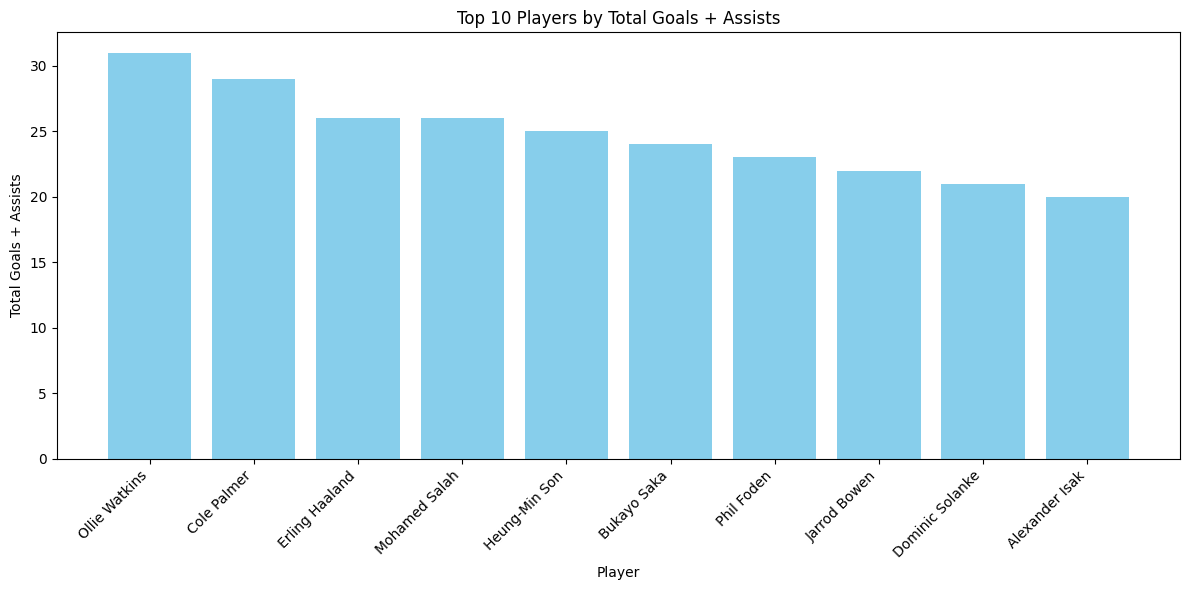

In [152]:
footBall['Goals'] = pd.to_numeric(footBall['Goals'], errors='coerce')
footBall['Assists'] = pd.to_numeric(footBall['Assists'], errors='coerce')

footBall.dropna(subset=['Goals', 'Assists'], inplace=True)


footBall['Total Goals + Assists'] = footBall['Goals'] + footBall['Assists']

footBall_sorted = footBall.sort_values(by='Total Goals + Assists', ascending=False)

# Plot the bar chart of top 10 players by total goals plus assists
plt.figure(figsize=(12, 6))
plt.bar(footBall_sorted['Name'][:10], footBall_sorted['Total Goals + Assists'][:10], color='skyblue')
plt.xlabel('Player')
plt.ylabel('Total Goals + Assists')
plt.title('Top 10 Players by Total Goals + Assists')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

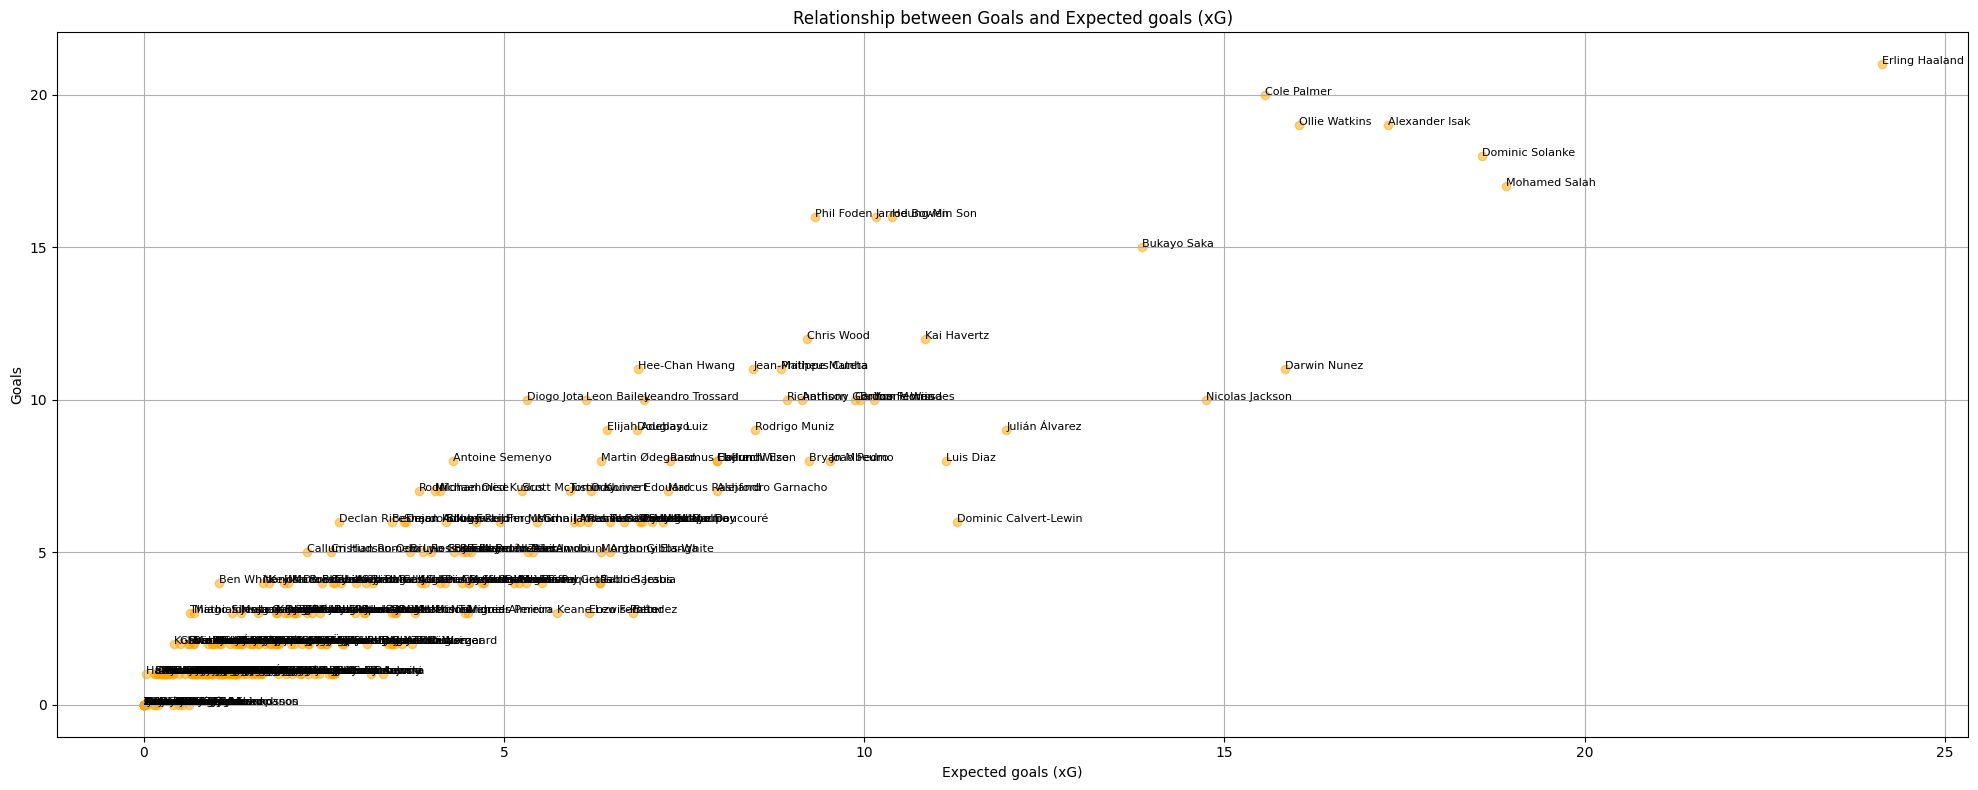

In [161]:
plt.figure(figsize=(20, 8))
plt.scatter(footBall['Expected goals (xG)'], footBall['Goals'], color='orange', alpha=0.5)
plt.xlabel('Expected goals (xG)')
plt.ylabel('Goals')
plt.title('Relationship between Goals and Expected goals (xG)')

for i, name in enumerate(footBall['Name']):
    plt.annotate(name, (footBall['Expected goals (xG)'][i], footBall['Goals'][i]), fontsize=8)

plt.grid(True)
plt.tight_layout()
plt.show()

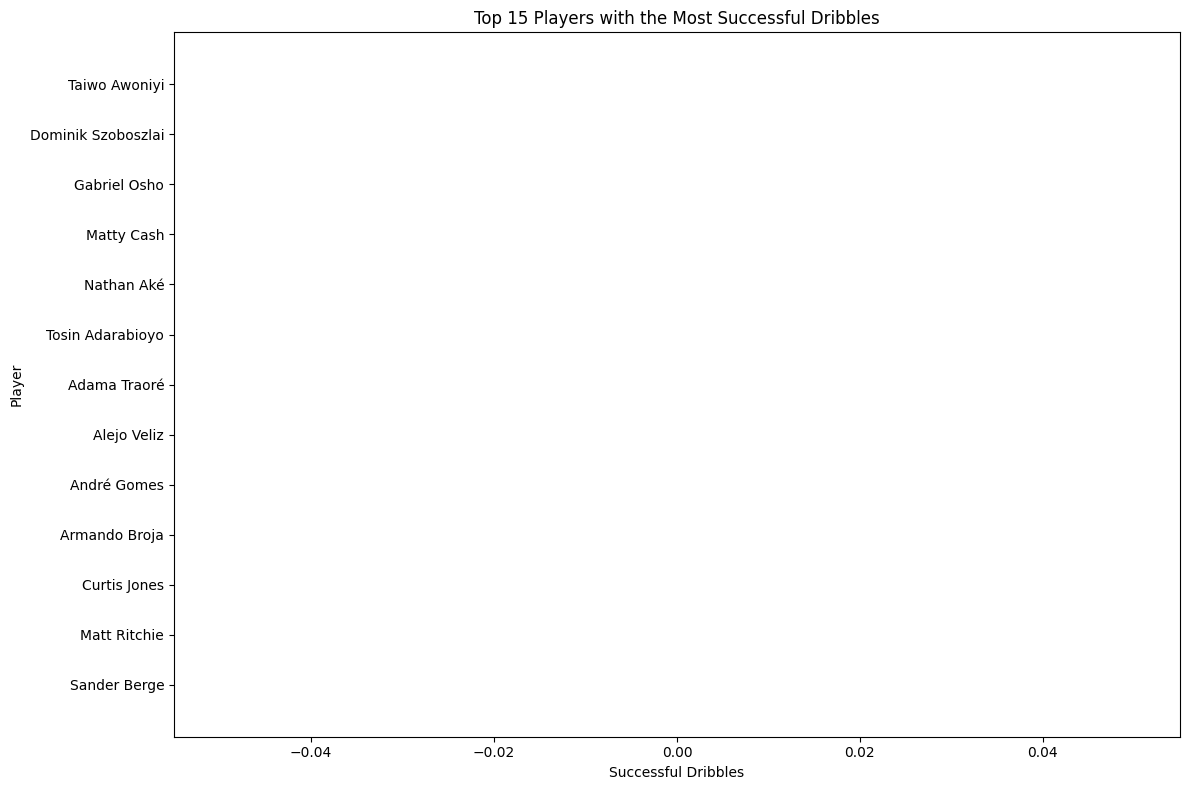

In [171]:
top_15_dribblers = footBall.sort_values(by='Successful dribbles', ascending=False).head(15)

plt.figure(figsize=(12, 8))
plt.barh(top_15_dribblers['Name'], top_15_dribblers['Successful dribbles'], color='blue')
plt.xlabel('Successful Dribbles')
plt.ylabel('Player')
plt.title('Top 15 Players with the Most Successful Dribbles')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

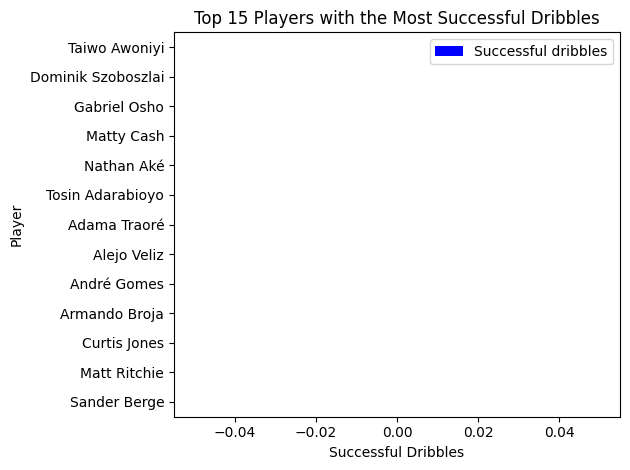

In [170]:

top_15_dribblers = footBall.sort_values(by='Successful dribbles', ascending=False).head(15)


plt.figure(figsize=(12, 8))
top_15_dribblers.plot(kind='barh', x='Name', y='Successful dribbles', color='blue')
plt.xlabel('Successful Dribbles')
plt.ylabel('Player')
plt.title('Top 15 Players with the Most Successful Dribbles')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

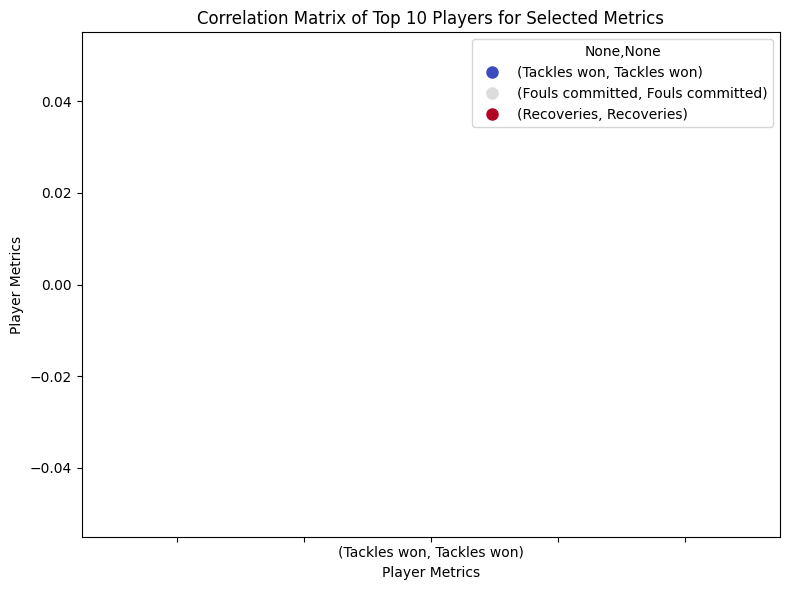

In [183]:
footBall['Fouls committed'] = pd.to_numeric(footBall['Fouls committed'], errors='coerce')


metrics = ['Tackles won', 'Fouls committed', 'Recoveries']


top_players = {}
for metric in metrics:
    top_players[metric] = footBall.nlargest(10, metric)[['Name', metric]].set_index('Name')


correlation_matrix = pd.concat(top_players, axis=1).corr()

correlation_matrix.plot(figsize=(8, 6), cmap='coolwarm', marker='o', markersize=8, linestyle='none')
plt.title('Correlation Matrix of Top 10 Players for Selected Metrics')
plt.xlabel('Player Metrics')
plt.ylabel('Player Metrics')
plt.tight_layout()
plt.show()
